In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [76]:
file_name = Path("Resources/national_M2022_dl.xlsx")
occupation_data = pd.read_excel(file_name)

In [77]:
occupation_data.sample(10)

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1387,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-7061,Cleaners of Vehicles and Equipment,...,14.9,17.46,20.92,22500,27470,31000,36310,43520,NaN,NaN
1244,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,51-7030,"Model Makers and Patternmakers, Wood",...,22.17,26.44,37.19,34900,38180,46100,55000,77360,NaN,NaN
163,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,15-2041,Statisticians,...,47.56,62.05,77.55,58090,76360,98920,129060,161300,NaN,NaN
1374,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,53-6099,"Transportation Workers, All Other",...,17.99,22.59,29.19,23920,29460,37430,47000,60720,NaN,NaN
1105,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,49-3090,Miscellaneous Vehicle and Mobile Equipment Mec...,...,16.95,19.06,23.38,27630,29750,35250,39640,48630,NaN,NaN
857,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,43-3070,Tellers,...,17.49,18.97,22.29,28570,31140,36380,39450,46350,NaN,NaN
1278,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,51-9041,"Extruding, Forming, Pressing, and Compacting M...",...,18.98,23.01,27.46,30290,34720,39480,47870,57120,NaN,NaN
53,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-9071,Gambling Managers,...,38.8,55.19,78.46,49710,61920,80710,114790,163190,NaN,NaN
809,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,41-3030,"Securities, Commodities, and Financial Service...",...,32.44,53.23,91.16,40200,48300,67480,110710,189620,NaN,NaN
1002,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,47-2140,Painters and Paperhangers,...,22.16,27.55,34.69,32510,37600,46090,57300,72150,NaN,NaN


In [78]:
occupation_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [79]:
occupation_data = occupation_data[['OCC_CODE', 'OCC_TITLE', 'O_GROUP']]

In [80]:
occupation_data.head()
occupation_data.count()

OCC_CODE     1402
OCC_TITLE    1402
O_GROUP      1402
dtype: int64

In [81]:
occupation_data.rename(columns={'OCC_CODE':"2022 National Employment Matrix code",'OCC_TITLE' : "2022 National Employment Matrix title",'O_GROUP':"Occupation Group" },inplace=True)
occupation_data.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group
0,00-0000,All Occupations,total
1,11-0000,Management Occupations,major
2,11-1000,Top Executives,minor
3,11-1010,Chief Executives,broad
4,11-1011,Chief Executives,detailed


In [82]:
employement_file = Path("Resources/occupation.xlsx")
employement_data = pd.read_excel(employement_file, sheet_name ="Table 1.2",header=1)
employement_data.reset_index()

employement_data.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment distribution, percent, 2022","Employment distribution, percent, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Occupational openings, 2022-32 annual average"
0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,100.0,100.0,4665.5,2.8,18566.5
1,Management occupations,11-0000,Summary,12574.7,13257.7,7.6,7.8,683.0,5.4,1053.1
2,Top executives,11-1000,Summary,3832.2,3958.0,2.3,2.3,125.8,3.3,315.0
3,Chief executives,11-1011,Line item,280.0,257.0,0.2,0.2,-23.0,-8.2,15.3
4,General and operations managers,11-1021,Line item,3507.8,3655.1,2.1,2.2,147.3,4.2,296.3


In [83]:
wage_education_file = Path("Resources/occupation.xlsx")
wage_education_data = pd.read_excel(employement_file, sheet_name ="Table 1.7",header=1)
wage_education_data.reset_index()

wage_education_data.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310,—,—,—
1,Management occupations,11-0000,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360,—,—,—
2,Top executives,11-1000,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890,—,—,—
3,Chief executives,11-1011,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520,Bachelor's degree,5 years or more,NaN
4,General and operations managers,11-1021,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100,Bachelor's degree,5 years or more,NaN


In [84]:
wage_education_data.columns

Index(['2022 National Employment Matrix title',
       '2022 National Employment Matrix code', 'Occupation type',
       'Employment, 2022', 'Employment, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Percent self employed, 2022',
       'Occupational openings, 2022-32 annual average',
       'Median annual wage, 2022(1)', 'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [85]:
wage_education_selected = wage_education_data[['2022 National Employment Matrix title',
       '2022 National Employment Matrix code', 'Occupation type','Percent self employed, 2022','Median annual wage, 2022(1)','Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation']]
wage_education_selected.head()

,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Percent self employed, 2022","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,Summary,6,46310,—,—,—
1,Management occupations,11-0000,Summary,15.8,107360,—,—,—
2,Top executives,11-1000,Summary,1.8,99890,—,—,—
3,Chief executives,11-1011,Line item,21.2,189520,Bachelor's degree,5 years or more,NaN
4,General and operations managers,11-1021,Line item,0.3,98100,Bachelor's degree,5 years or more,NaN


In [86]:
employment_wage_education = pd.merge(employement_data,wage_education_selected,"left",on= "2022 National Employment Matrix code")
employment_wage_education.tail(50)

,2022 National Employment Matrix title_x,2022 National Employment Matrix code,Occupation type_x,"Employment, 2022","Employment, 2032","Employment distribution, percent, 2022","Employment distribution, percent, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Occupational openings, 2022-32 annual average",2022 National Employment Matrix title_y,Occupation type_y,"Percent self employed, 2022","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
1067,Shuttle drivers and chauffeurs,53-3053,Line item,218.4,235.9,0.1,0.1,17.5,8.0,32.6,Shuttle drivers and chauffeurs,Line item,4.4,32800,No formal educational credential,NaN,Short-term on-the-job training
1068,Taxi drivers,53-3054,Line item,177.3,213.7,0.1,0.1,36.4,20.6,22.8,Taxi drivers,Line item,91.5,30670,No formal educational credential,NaN,Short-term on-the-job training
1069,"Motor vehicle operators, all other",53-3099,Line item,68.3,73.7,0.0,0.0,5.4,7.9,10.9,"Motor vehicle operators, all other",Line item,26.3,33210,No formal educational credential,NaN,Short-term on-the-job training
1070,Rail transportation workers,53-4000,Summary,90.5,91.8,0.1,0.1,1.2,1.4,7.7,Rail transportation workers,Summary,—,68960,—,—,—
1071,Locomotive engineers and operators,53-4010,Summary,32.3,32.6,0.0,0.0,0.3,1.0,2.6,Locomotive engineers and operators,Summary,—,73770,—,—,—
1072,Locomotive engineers,53-4011,Line item,29.7,29.9,0.0,0.0,0.2,0.8,2.4,Locomotive engineers,Line item,—,74570,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
1073,"Rail yard engineers, dinkey operators,...",53-4013,Line item,2.6,2.6,0.0,0.0,0.1,2.4,0.2,"Rail yard engineers, dinkey operators,...",Line item,—,56340,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1074,"Railroad brake, signal, and switch opera...",53-4022,Line item,12.2,12.3,0.0,0.0,0.1,1.2,1.2,"Railroad brake, signal, and switch opera...",Line item,—,67540,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1075,Railroad conductors and yardmasters,53-4031,Line item,34.2,34.6,0.0,0.0,0.4,1.1,2.8,Railroad conductors and yardmasters,Line item,—,68180,High school diploma or equivalent,NaN,Moderate-term on-the-job training
1076,Subway and streetcar operators,53-4041,Line item,9.5,9.8,0.0,0.0,0.3,3.5,1.0,Subway and streetcar operators,Line item,—,88260,High school diploma or equivalent,NaN,Moderate-term on-the-job training


In [87]:
employment_wage_education_complete = pd.merge(occupation_data,employment_wage_education,how="right",on= "2022 National Employment Matrix code")
employment_wage_education_complete.head(50)

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,2022 National Employment Matrix title_x,Occupation type_x,"Employment, 2022","Employment, 2032","Employment distribution, percent, 2022","Employment distribution, percent, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Occupational openings, 2022-32 annual average",2022 National Employment Matrix title_y,Occupation type_y,"Percent self employed, 2022","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,00-0000,All Occupations,total,"Total, all occupations",Summary,164482.6,169148.1,100.0,100.0,4665.5,2.8,18566.5,"Total, all occupations",Summary,6,46310,—,—,—
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,7.6,7.8,683.0,5.4,1053.1,Management occupations,Summary,15.8,107360,—,—,—
2,11-1000,Top Executives,minor,Top executives,Summary,3832.2,3958.0,2.3,2.3,125.8,3.3,315.0,Top executives,Summary,1.8,99890,—,—,—
3,11-1011,Chief Executives,detailed,Chief executives,Line item,280.0,257.0,0.2,0.2,-23.0,-8.2,15.3,Chief executives,Line item,21.2,189520,Bachelor's degree,5 years or more,NaN
4,11-1021,General and Operations Managers,detailed,General and operations managers,Line item,3507.8,3655.1,2.1,2.2,147.3,4.2,296.3,General and operations managers,Line item,0.3,98100,Bachelor's degree,5 years or more,NaN
5,11-1031,Legislators,detailed,Legislators,Line item,44.4,46.0,0.0,0.0,1.5,3.4,3.4,Legislators,Line item,—,48090,Bachelor's degree,Less than 5 years,NaN
6,11-2000,"Advertising, Marketing, Promotions, Public Rel...",minor,"Advertising, marketing, promotions, public...",Summary,1049.4,1102.2,0.6,0.7,52.8,5.0,85.0,"Advertising, marketing, promotions, public...",Summary,3.5,132820,—,—,—
7,11-2011,Advertising and Promotions Managers,detailed,Advertising and promotions managers,Line item,30.9,31.4,0.0,0.0,0.6,1.9,2.8,Advertising and promotions managers,Line item,27,127830,Bachelor's degree,Less than 5 years,NaN
8,11-2020,Marketing and Sales Managers,broad,Marketing and sales managers,Summary,912.9,959.1,0.6,0.6,46.2,5.1,74.4,Marketing and sales managers,Summary,2.9,133880,—,—,—
9,11-2021,Marketing Managers,detailed,Marketing managers,Line item,358.2,381.9,0.2,0.2,23.7,6.6,31.2,Marketing managers,Line item,5.3,140040,Bachelor's degree,5 years or more,NaN


In [88]:
employment_wage_education_complete.count()

2022 National Employment Matrix code                                         1120
2022 National Employment Matrix title                                        1117
Occupation Group                                                             1117
2022 National Employment Matrix title_x                                      1124
Occupation type_x                                                            1120
Employment, 2022                                                             1120
Employment, 2032                                                             1120
Employment distribution, percent, 2022                                       1120
Employment distribution, percent, 2032                                       1120
Employment change, numeric, 2022-32                                          1120
Employment change, percent, 2022-32                                          1120
Occupational openings, 2022-32 annual average                                1120
2022 National Em

In [89]:
automation_file = Path("Resources/automation_data_by_state.csv")
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")


automation_data.head(50)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.0150,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.1600,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.0390,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.0140,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.0130,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
5,11-2031,Public Relations and Fundraising Managers,0.0150,400,150,1240,300,7010,960,980,...,0,870,3680,380,210,1250,2100,130,1010,0
6,11-3011,Administrative Services Managers,0.7300,640,530,6870,1850,40720,2280,4110,...,340,7550,20440,2120,410,4120,4890,1590,6070,220
7,11-3021,Computer and Information Systems Managers,0.0350,3260,340,6720,2100,51840,6340,7900,...,210,5540,20010,4190,340,13720,11790,720,6400,200
8,11-3031,Financial Managers,0.0690,4990,870,10930,3020,70540,5930,14210,...,610,13690,27670,4860,740,13370,12680,1580,8810,560
9,11-3051,Industrial Production Managers,0.0300,3110,110,2530,1700,19120,1100,2800,...,400,5030,10150,1840,400,2400,2500,700,6720,290


In [90]:
automation_data.count()

SOC                     702
Occupation              702
Probability             702
Alabama                 702
Alaska                  702
Arizona                 702
Arkansas                702
California              702
Colorado                702
Connecticut             702
Delaware                702
District of Columbia    702
Florida                 702
Georgia                 702
Hawaii                  702
Idaho                   702
Illinois                702
Indiana                 702
Iowa                    702
Kansas                  702
Kentucky                702
Louisiana               702
Maine                   702
Maryland                702
Massachusetts           702
Michigan                702
Minnesota               702
Mississippi             702
Missouri                702
Montana                 702
Nebraska                702
Nevada                  702
New Hampshire           702
New Jersey              702
New Mexico              702
New York            

In [91]:
automation_data.rename(columns={"SOC":"2022 National Employment Matrix code","Probability":"Automation Probability"},inplace =True) 

In [92]:
automation_data.head()

,2022 National Employment Matrix code,Occupation,Automation Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


In [93]:
occupation_data_complete = pd.merge(employment_wage_education_complete,automation_data,how="left",on=["2022 National Employment Matrix code","2022 National Employment Matrix code"])
occupation_data_complete.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,2022 National Employment Matrix title_x,Occupation type_x,"Employment, 2022","Employment, 2032","Employment distribution, percent, 2022","Employment distribution, percent, 2032","Employment change, numeric, 2022-32",...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,00-0000,All Occupations,total,"Total, all occupations",Summary,164482.6,169148.1,100.0,100.0,4665.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,7.6,7.8,683.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-1000,Top Executives,minor,Top executives,Summary,3832.2,3958.0,2.3,2.3,125.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-1011,Chief Executives,detailed,Chief executives,Line item,280.0,257.0,0.2,0.2,-23.0,...,560.0,5460.0,5890.0,3650.0,280.0,6320.0,5910.0,980.0,3740.0,160.0
4,11-1021,General and Operations Managers,detailed,General and operations managers,Line item,3507.8,3655.1,2.1,2.2,147.3,...,3730.0,44400.0,168610.0,36200.0,2760.0,52380.0,43760.0,10200.0,32350.0,4840.0


In [94]:
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title', 'Occupation Group',
       '2022 National Employment Matrix title_x', 'Occupation type_x',
       'Employment, 2022', 'Employment, 2032',
       'Employment distribution, percent, 2022',
       'Employment distribution, percent, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32',
       'Occupational openings, 2022-32 annual average',
       '2022 National Employment Matrix title_y', 'Occupation type_y',
       'Percent self employed, 2022', 'Median annual wage, 2022(1)',
       'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Occupation', 'Automation Probability', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia'

In [95]:
Employment_distribution_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major" ]
Employment_distribution_df.count()
Employment_distribution_df


,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,2022 National Employment Matrix title_x,Occupation type_x,"Employment, 2022","Employment, 2032","Employment distribution, percent, 2022","Employment distribution, percent, 2032","Employment change, numeric, 2022-32",...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,11-0000,Management Occupations,major,Management occupations,Summary,12574.7,13257.7,7.6,7.8,683.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,13-0000,Business and Financial Operations Occupations,major,Business and financial operations occupations,Summary,10591.1,11179.7,6.4,6.6,588.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,15-0000,Computer and Mathematical Occupations,major,Computer and mathematical occupations,Summary,5277.6,6081.4,3.2,3.6,803.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,17-0000,Architecture and Engineering Occupations,major,Architecture and engineering occupations,Summary,2611.8,2746.8,1.6,1.6,134.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,19-0000,"Life, Physical, and Social Science Occupations",major,"Life, physical, and social science occupations",Summary,1473.7,1563.2,0.9,0.9,89.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,21-0000,Community and Social Service Occupations,major,Community and social service occupations,Summary,2936.5,3164.2,1.8,1.9,227.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,23-0000,Legal Occupations,major,Legal occupations,Summary,1362.4,1442.3,0.8,0.9,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,25-0000,Educational Instruction and Library Occupations,major,Educational instruction and library occupations,Summary,9354.1,9570.6,5.7,5.7,216.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,27-0000,"Arts, Design, Entertainment, Sports, and Media...",major,"Arts, design, entertainment, sports, and med...",Summary,3071.1,3187.0,1.9,1.9,115.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,29-0000,Healthcare Practitioners and Technical Occupat...,major,Healthcare practitioners and technical occup...,Summary,9481.0,10243.7,5.8,6.1,762.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
Employment_distribution_df =Employment_distribution_df[["2022 National Employment Matrix title",'Employment, 2022','Employment, 2032']]
Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")
Employment_distribution_df = Employment_distribution_df.set_index("2022 National Employment Matrix title")
Employment_distribution_df

C:\Users\Vinaya Kusuma\AppData\Local\Temp\ipykernel_34708\3291925120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")


,"Employment, 2022","Employment, 2032"
2022 National Employment Matrix title,,
Management,12574.7,13257.7
Business and Financial Operations,10591.1,11179.7
Computer and Mathematical,5277.6,6081.4
Architecture and Engineering,2611.8,2746.8
"Life, Physical, and Social Science",1473.7,1563.2
Community and Social Service,2936.5,3164.2
Legal,1362.4,1442.3
Educational Instruction and Library,9354.1,9570.6
"Arts, Design, Entertainment, Sports, and Media",3071.1,3187.0


<Axes: xlabel='Major Employment Sectors', ylabel='Employment (Numbers in thousands)'>

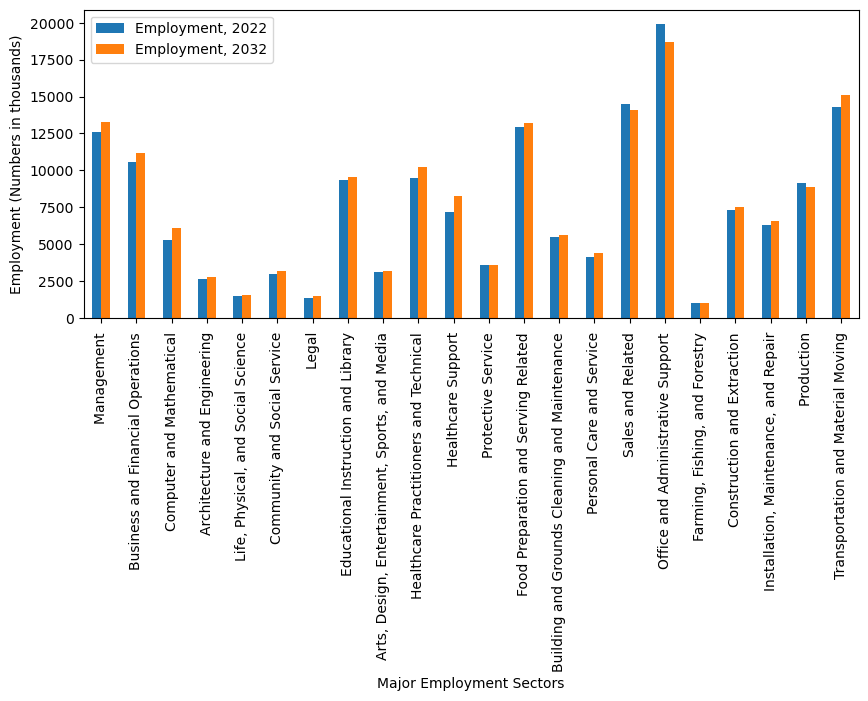

In [97]:
Employment_distribution_df.plot(kind="bar",xlabel='Major Employment Sectors',ylabel = "Employment (Numbers in thousands)", figsize=(10,4))

In [115]:
# Occupation_Automation_df = Employment_distribution_df.loc[Employment_distribution_df[ 'Occupation Group']=="detailed"]
occupation_data_complete.columns

Index(['2022 National Employment Matrix code',
       '2022 National Employment Matrix title', 'Occupation Group',
       '2022 National Employment Matrix title_x', 'Occupation type_x',
       'Employment, 2022', 'Employment, 2032',
       'Employment distribution, percent, 2022',
       'Employment distribution, percent, 2032',
       'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32',
       'Occupational openings, 2022-32 annual average',
       '2022 National Employment Matrix title_y', 'Occupation type_y',
       'Percent self employed, 2022', 'Median annual wage, 2022(1)',
       'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation',
       'Occupation', 'Automation Probability', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia'

In [138]:
occupation_detailed = occupation_data_complete[occupation_data_complete['Occupation Group']=="detailed"]
occupation_detailed.columns
occupation_automation = occupation_detailed[['2022 National Employment Matrix title',"Automation Probability"] ]

occupation_automation.dropna()
occupation_automation_sorted = occupation_automation.sort_values("Automation Probability",ascending=False)
occupation_automation_sorted.head(50)



,2022 National Employment Matrix title,Automation Probability
83,Insurance Underwriters,0.99
709,New Accounts Clerks,0.99
899,Watch and Clock Repairers,0.99
981,"Sewers, Hand",0.99
268,"Title Examiners, Abstractors, and Searchers",0.99
348,Library Technicians,0.99
736,Data Entry Keyers,0.99
716,Cargo and Freight Agents,0.99
1039,Photographic Process Workers and Processing Ma...,0.99
91,Tax Preparers,0.99


In [137]:
fastest_growing_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] > 18.0]
fastest_growing_occ = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]

,2022 National Employment Matrix title,"Employment change, percent, 2022-32"
40,Medical and Health Services Managers,28.4
65,Logisticians,18.3
85,Financial Examiners,19.5
97,Information Security Analysts,31.5
98,Computer and Information Research Scientists,22.7
109,Software Developers,25.7
110,Software Quality Assurance Analysts and Testers,20.3
115,Actuaries,23.2
117,Operations Research Analysts,22.5
118,Statisticians,31.6
